## Characteristics

Vector_XYZ is a modulus for simulation of 3D vector fields:

* The generation of light is at a plane using Vector_source_XY.
* The 3D masks are inherited from Scalar_masks_XYZ. This include simple objects such as sphere, cylinder, cube, or more complex objects, included as an stl file.
* The propagation of light is implemented with FP_WPM. function.
* Parameters from the simulations can be obtained such as EH fields, Intensities, Poynting vector, averaged Poynting vector, Poynting_total, irradiance, density of energy, and more.
* Planes of the simualtion can be converted to vector_fields_XY or vector_fields_XZ.


The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.z (numpy.array): linear array with equidistant positions. The number of data is preferibly $2^n$.
* self.wavelength (float): wavelength of the incident field.
* (numpy.array): complex electromagnetic field:  
    - self.Ex
    - self.Ey
    - self.Ez
    - self.Hx
    - self.Hy
    - self.Hz

    
We can also find these atributes:

* self.X (numpy.array): equal size to x * y * z. 
* self.Y (numpy.array): equal size to x * y * z. 
* self.Z (numpy.array): equal size to x * y * z. 
* self.n (numpy.array): refractive index

* self.info (str): description of data.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The propagation techiniques implemented are:

* FP_WPM - Vector propagation including refraction through surfaces.


### Creating an instance

An instance must be created before starting to operate with light sources. The initialization accepts several arguments.   

In [1]:
from diffractio import um, degrees, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XYZ import Vector_field_XYZ

from py_pol.jones_vector import Jones_vector  # type: ignore

In [2]:
length = 10 * um
x0 = np.linspace(-length / 2, length / 2, 150)
y0 = np.linspace(-length / 2, length / 2, 150)
z0 = np.linspace(0 * um, 12 * um, 150)
wavelength = 0.6328 * um

Exyz = Vector_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

### Generating a vector light field

Light sources are defined as a Vector_source_XY. Vector sources are generated using a scalar source and providing a vector polarization.

In [3]:
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave()

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0 * um, 0 * um), radius=(3 * um, 3 * um))
u2 = u1 * t1


j0 = Jones_vector()
j0.general_azimuth_ellipticity(azimuth=0 * degrees, ellipticity=0 * degrees)

Exyz.incident_field(u0=u2, j0=j0)

### Adding 3D objects

The 3D objects are added to the simulation using an Scalar_mask_XYZ by means of refractive_index_from_scalarXYZ object.

In [4]:
uxyz = Scalar_mask_XYZ(x0, y0, z0, wavelength)
uxyz.sphere(
    r0=(0 * um, 0 * um, 5 * um),
    radius=(4 * um, 4 * um, 4 * um),
    refractive_index=1.5,
    angles=0 * degrees,
)

Exyz.refractive_index_from_scalarXYZ(uxyz)

### Propagation

The FP_WPM function is used to propagate the light field through the 3D objects. 


In [5]:
Exyz.FP_WPM(has_edges=True, verbose=True)

Time = 5.22 s, time/loop = 34.79 ms


Parameters from the simulation can be obtaned using the get() method:
- 'fields'
- 'intensity'
- 'intensities'
- 'phases'
- 'stokes'
- TODO: add poynting, etc.



In [6]:
intensity = Exyz.get("intensity", is_matrix=True)
print(intensity.shape)

(150, 150, 150)


## Pass to XZ or YZ plane

For a simple visualization, the XYZ vector field can be converted to a XZ or YZ plane. This is done by the methods to_Vector_field_XZ or to_Vector_field_YZ.

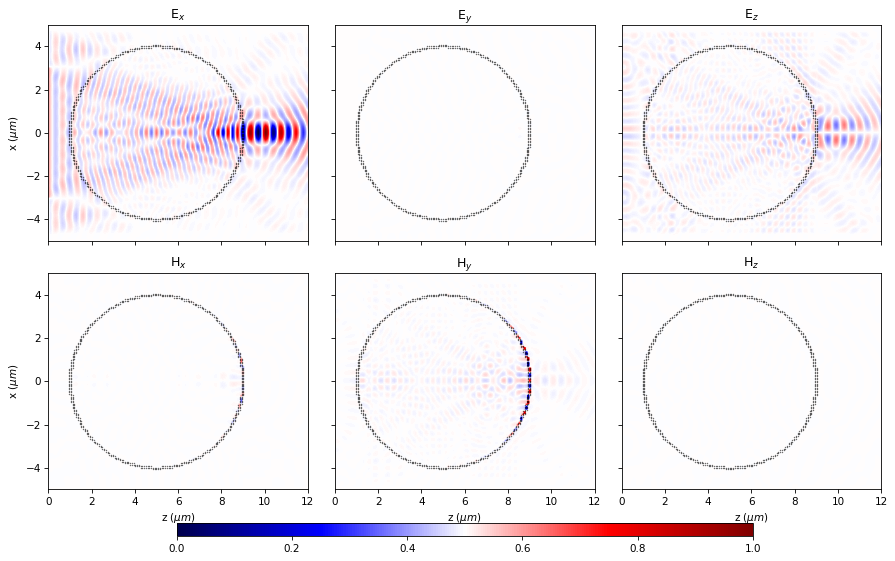

In [7]:
Exz = Exyz.to_Vector_field_XZ(y0=0 * um)
edges = Exz.surface_detection(min_incr=0.1, has_draw=False)
Exz.borders = edges

Exz.draw("EH", draw_borders=True, color="k.", ms=0.5)

It is clear that at the YZ plane the electric field is different, as the polarization is parallel to the X axis.

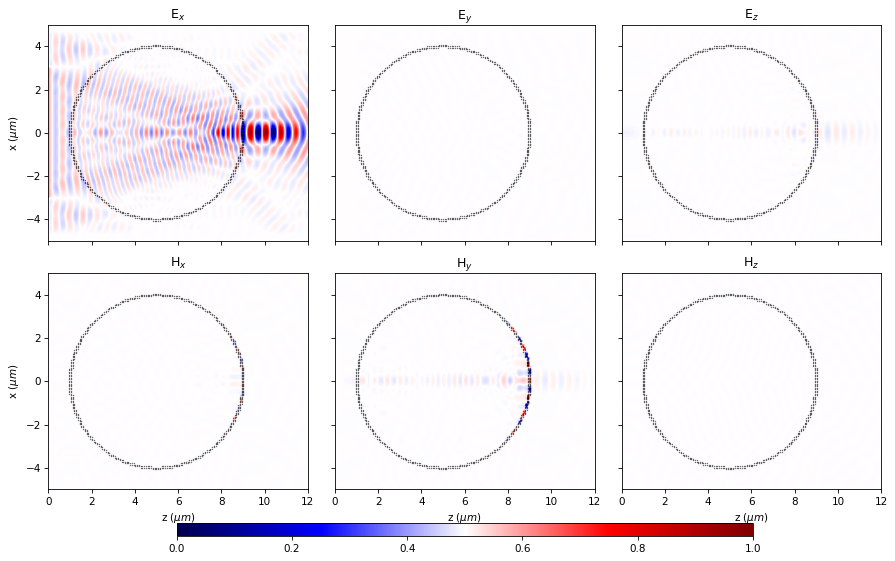

In [8]:
Eyz = Exyz.to_Vector_field_YZ(x0=0 * um)
edges = Eyz.surface_detection(min_incr=0.1, has_draw=False)
Eyz.borders = edges

Eyz.draw("EH", draw_borders=True, color="k.", ms=0.5)

## Pass to XY plane

Also, the XYZ vector field can be converted to a XY. This is done by the methods to_Vector_field_XY.

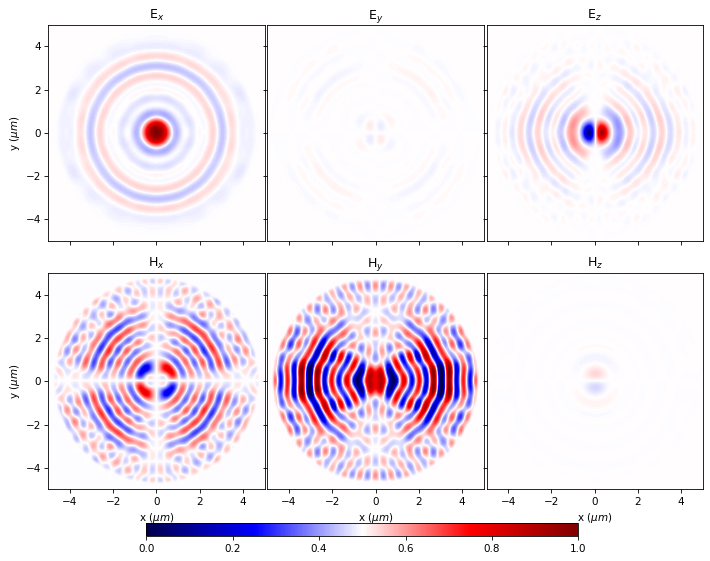

In [18]:
Exy = Exyz.to_Vector_field_XY(z0=9.5 * um)
Exy.surface_detection(has_draw=False)
Exy.draw("EH")

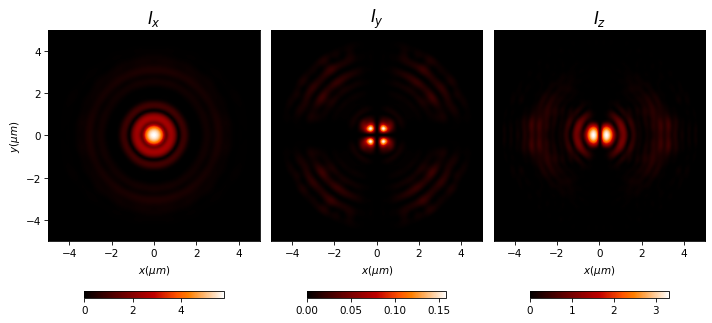

In [19]:
Exy.draw("intensities", logarithm=1e1)